<a href="https://colab.research.google.com/github/uomerozkaya/Data-Mining/blob/main/SVM%26K_NN_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

## SVM

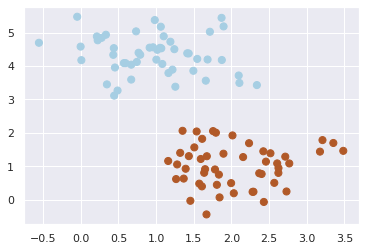

In [133]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=0, cluster_std=0.6)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = plt.cm.Paired);


SVM'nin ayrımcı sınıflandırmayı desteklediğini biliyoruz. iki boyutlu olması durumunda bir doğru veya çoklu boyut olması durumunda manifold bularak sınıfları birbirinden ayırır. Yukarıdaki veri kümesinde aşağıdaki gibi uygulanır

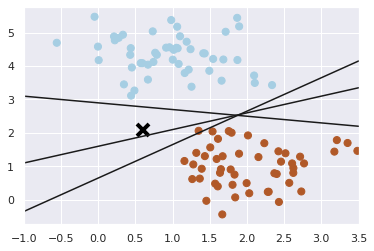

In [134]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = plt.cm.Paired)
plt.plot([0.6], [2.1], 'x', color = 'black', markeredgewidth = 4, markersize = 12)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
  plt.plot(xfit, m * xfit + b, '-k')
  plt.xlim(-1, 3.5);

SVM'nin ana amacı, maksimum marjinal hiperdüzlem (MMH) bulmak için veri kümelerini sınıflara bölmektir, bu nedenle sınıflar arasında sıfır bir çizgi çizmek yerine, her çizginin etrafına en yakın noktaya kadar bir genişlikte bir kenar boşluğu çizebiliriz. Aşağıdaki gibi yapılabilir.

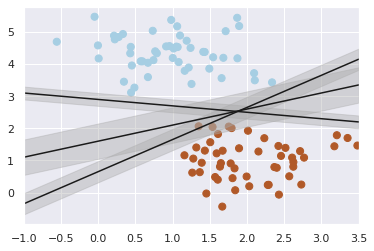

In [135]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = plt.cm.Paired)

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
   yfit = m * xfit + b
   plt.plot(xfit, yfit, '-k')
   plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
   color = '#AAAAAA', alpha = 0.4)
plt.xlim(-1, 3.5);

Çıktıdaki yukarıdaki görüntüden, ayırt edici sınıflandırıcılar içindeki “marginsi” kolayca gözlemleyebiliriz. SVM, marginsi maksimize eden çizgiyi seçecektir.

Daha sonra, bu veriler üzerinde bir SVM modeli eğitmek için Scikit-Learn'ün destek vektör sınıflandırıcısını kullanacağız. Burada, SVM'ye uyması için aşağıdaki gibi doğrusal çekirdek kullanıyoruz

In [136]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


Şimdi, daha iyi bir şekilde, 2D SVC için karar fonksiyonlarını çizecektir

In [137]:
def decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    Z = model.decision_function(xy).reshape(X.shape)     
    

Modeli değerlendirmek için aşağıdaki gibi grid oluşturmamız gerekiyor.



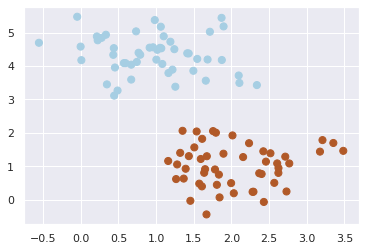

In [138]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
decision_function(model);

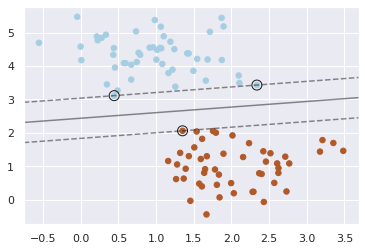

In [139]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

Bu destek vektör noktaları, sınıflandırıcının support_vectors_ özniteliğinde aşağıdaki gibi saklanır

In [140]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [1.35139348, 2.06383637]])

# K-NN

In [141]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
#Machine Learning Model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
#Import make_plobs clustering data generator
from sklearn.datasets import make_blobs
#Drawing
import matplotlib.pyplot as plt
%matplotlib inline


Eğitim verilerini ve test verilerini tanımlayalım.

In [142]:
train, target = make_blobs(n_samples=100, centers=2, n_features=2, random_state=0, cluster_std=0.6)

#Training data
X_train = train
Y_train = target

In [143]:
#Get x, y axis value range
xmin,xmax = train[:,0].min()-0.5,train[:,0].max()+0.5
ymin,ymax = train[:,1].min()-0.5,train[:,1].max()+0.5

#Generate two lists of x and y for gridding
x = np.arange(xmin,xmax,0.05)
y = np.arange(ymin,ymax,0.05)
xx,yy=np.meshgrid(x,y)

#Test Data
x_test=np.c_[xx.ravel(),yy.ravel()]

## n_neighbors = 3 için;

Öğrenme modelini belirleyelim.

In [144]:
#knn model
knnclf = KNeighborsClassifier(n_neighbors=3)
#logistic model
logistic = LogisticRegression()

In [145]:
knnclf.fit(X_train,Y_train)
#logistic.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

Tahmin yapmak için eğitilmiş modeli kullanalım

In [146]:
y_pre_knn = knnclf.predict(x_test)
#y_pre_logistic = logistic.predict(x_test)

In [147]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['r','g','b'])

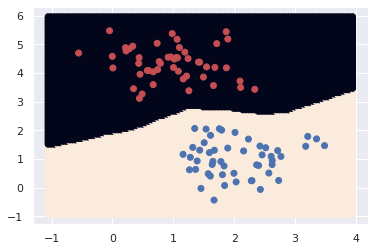

In [148]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_pre_knn)
plt.scatter(train[:,0],train[:,1],c=target,cmap=cmap)

In [149]:
print(knnclf.predict([[2,3]]))

[0]


## n_neighbors = 50 için

In [150]:
#knn model
knnclf = KNeighborsClassifier(n_neighbors=50)

In [151]:
knnclf.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [152]:
y_pre_knn = knnclf.predict(x_test)

In [153]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['r','g','b'])

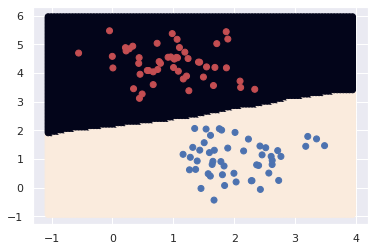

In [154]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_pre_knn)
plt.scatter(train[:,0],train[:,1],c=target,cmap=cmap)

In [155]:
print(knnclf.predict([[2,3]]))

[0]
